In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, binary_dilation, square
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from matplotlib.patches import Rectangle
from skimage import measure
import numpy as np
from skimage.morphology import skeletonize, thin
from scipy.spatial.distance import euclidean
from os import listdir
from os.path import isfile, join
import os
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.filters import threshold_otsu
from skimage import feature
import uuid

In [2]:
dir_parts = r'C:\Users\Mihail\opencv-text-detection\images'
#dir_parts = r'C:\Users\Mihail\300 capcha screens'

In [3]:
onlyfiles = [f for f in listdir(dir_parts)]

In [4]:
onlyfiles

['car_wash.png',
 'image_0.jpg',
 'image_1.jpg',
 'lebron_james.jpg',
 'sign.jpg',
 'word_2.jpg']

In [5]:
from IPython.display import Image
image = Image(filename=dir_parts+'\\'+onlyfiles[-1])

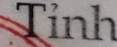

In [6]:
image

In [8]:
file_name = onlyfiles[-1]

In [9]:
image = cv2.imread(dir_parts+'\\'+onlyfiles[-1])
letters = list(file_name[:file_name.find('.')])
ln=len(letters)
print("letters=", ln)

letters= 6


In [15]:
image.shape

(47, 117, 3)

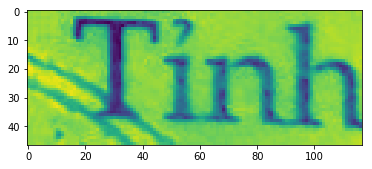

In [16]:
chans = cv2.split(image)[2]
plt.imshow(chans)

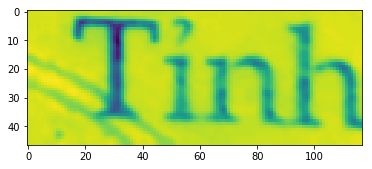

In [362]:
normilized = chans**0.3
normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7
plt.imshow(normilized)

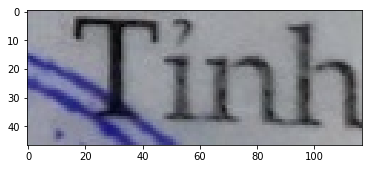

In [363]:
plt.imshow(image)

In [364]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
chans = cv2.split(image)[2]**0.3
#chans = cv2.split(image)[2]*7
normilized = chans**0.3
normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7
thresh=normilized.mean()*0.999
#thresh = threshold_otsu(normilized)
binary = normilized > thresh

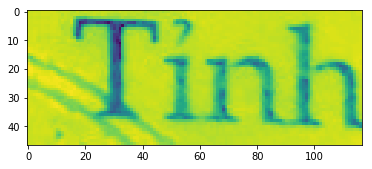

In [365]:
plt.imshow(chans)

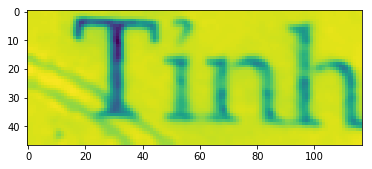

In [366]:
plt.imshow(normilized)

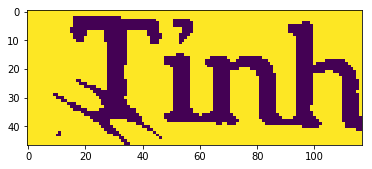

In [367]:
plt.imshow(binary)

In [316]:
#hsv_min = np.array((53, 0, 0), np.uint8)
#hsv_max = np.array((83, 255, 255), np.uint8)

In [317]:
contours = measure.find_contours(binary, 0.3)

print("contours=", len(contours))
contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))

contours= 9


In [318]:
lst=[]
lst_countours_clean=[]
for n, contour in enumerate(contours):
    Xmin = int(np.floor(np.min(contour[:,1])))-4
    Xmax = int(np.ceil(np.max(contour[:,1])))+0
    Ymin = int(np.floor(np.min(contour[:,0])))-4
    Ymax = int(np.ceil(np.max(contour[:,0])))+4
    if Xmax-Xmin>5 and Ymax-Ymin>15:
        if len(lst)==0:
            lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
            lst_countours_clean.append(contour)

        elif len(lst)>0 and len(lst)<ln:

            check=[]
            for x in lst:
                rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                check.append(rox)
            min_distance = np.min(np.array(check))
            if min_distance>20:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)

        else:
            break

lst_countours_clean= 4


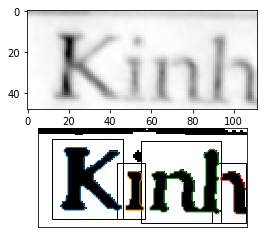

In [319]:
lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])

print("lst_countours_clean=", len(lst_countours_clean))

lst = sorted(lst, key=lambda x: x[0])

#canvas = np.zeros(img.shape)

fig, ax = plt.subplots(2,1)


ax[0].imshow(normilized, interpolation='nearest', cmap=plt.cm.gray)

ax[1].imshow(binary, interpolation='nearest', cmap=plt.cm.gray)
for i, contour in enumerate(lst_countours_clean):

        # Get the rectangle that contains the contour
        Xmin = lst[i][0]
        Xmax = lst[i][1]
        Ymin = lst[i][2]
        Ymax = lst[i][3]

        #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

        tmp = normilized[Ymin:Ymax, Xmin:Xmax]

        #tmp = dilation(tmp, [[1,1],[1,1]])
        #tmp = thin(tmp)
        #tmp = dilation(tmp, [[1,1],[1,1]])
        #plt.imsave(os.path.join(dir_parts,'t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

        rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)
        ax[1].add_patch(rect)

        ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1)


ax[1].axis('image')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

cashwagon_10_168079011.png
letters= 22
contours= 7
lst_countours_clean= 5


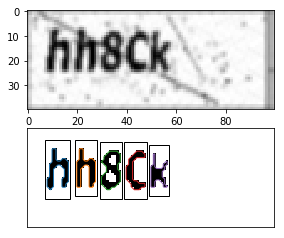

cashwagon_11_168079011.png
letters= 22
contours= 6
lst_countours_clean= 5


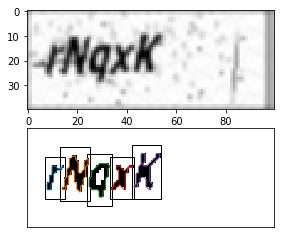

cashwagon_12_168079011.png
letters= 22
contours= 6
lst_countours_clean= 5


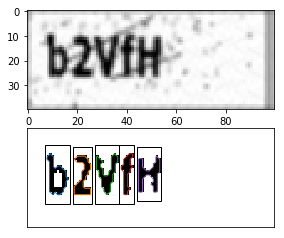

cashwagon_13_168079011.png
letters= 22
contours= 9
lst_countours_clean= 5


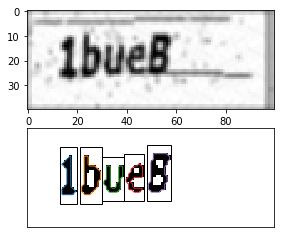

cashwagon_14_168079011.png
letters= 22
contours= 8
lst_countours_clean= 5


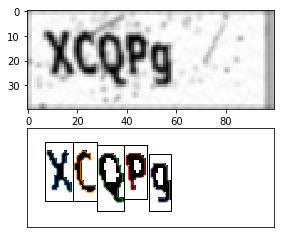

cashwagon_15_168079011.png
letters= 22
contours= 7
lst_countours_clean= 5


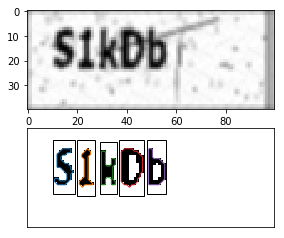

cashwagon_1_168079011.png
letters= 21
contours= 5
lst_countours_clean= 5


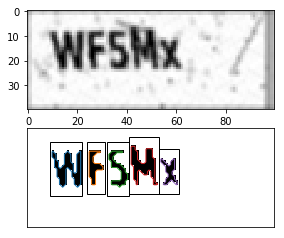

cashwagon_2_168079011.png
letters= 21
contours= 8
lst_countours_clean= 5


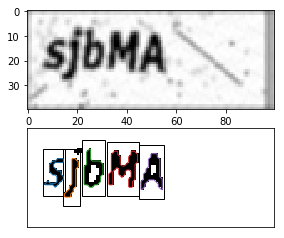

cashwagon_3_168079011.png
letters= 21
contours= 7
lst_countours_clean= 5


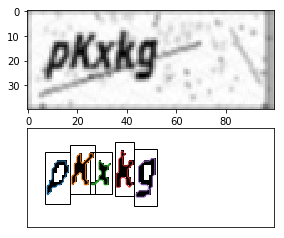

cashwagon_4_168079011.png
letters= 21
contours= 8
lst_countours_clean= 5


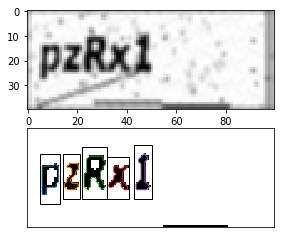

cashwagon_5_168079011.png
letters= 21
contours= 6
lst_countours_clean= 5


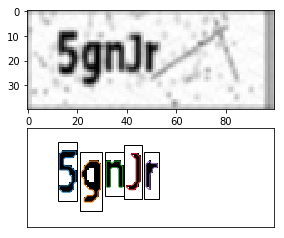

cashwagon_6_168079011.png
letters= 21
contours= 7
lst_countours_clean= 5


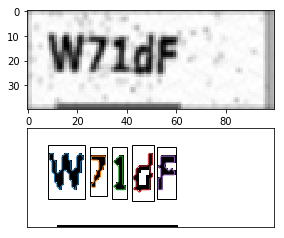

cashwagon_7_168079011.png
letters= 21
contours= 10
lst_countours_clean= 4


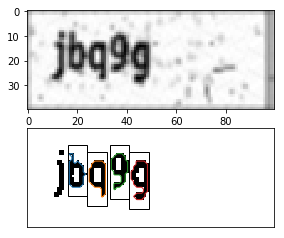

cashwagon_8_168079011.png
letters= 21
contours= 7
lst_countours_clean= 5


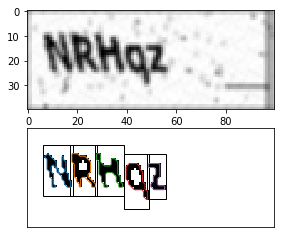

cashwagon_9_168079011.png
letters= 21
contours= 7
lst_countours_clean= 5


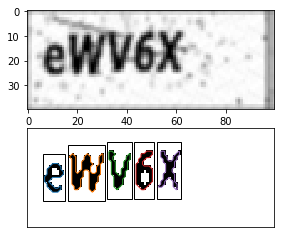

test.PNG
letters= 4
contours= 6
lst_countours_clean= 4


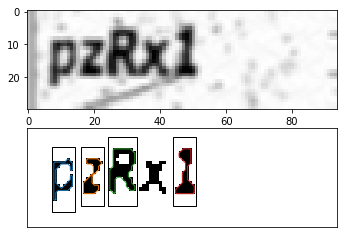

In [320]:
for file_name in onlyfiles:
    print(file_name)

    letters = list(file_name[:file_name.find('.')])
    ln=len(letters)
    print("letters=", ln)

    image = cv2.imread(os.path.join(dir_parts,file_name))
    
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    chans = cv2.split(image)[2]**0.3
    #chans = cv2.split(image)[0]*7
    normilized = chans**0.3
    normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7
    
    thresh=normilized.mean()*0.978
    #thresh=2.7
    #thresh = threshold_otsu(normilized)
    binary = normilized > thresh
    
    #blurred = cv2.GaussianBlur(chans, (1, 1), 0)
    #blurred = cv2.GaussianBlur(blurred, (3, 3), 0)

    #binaryv = blurred < thresh

    #img=skeletonize(binaryv)
    #img = (img==False).astype(int)

    contours = measure.find_contours(binary, 0.3)
    
    print("contours=", len(contours))
    contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))

    lst=[]
    lst_countours_clean=[]
    for n, contour in enumerate(contours):
        Xmin = int(np.floor(np.min(contour[:,1])))
        Xmax = int(np.ceil(np.max(contour[:,1])))
        Ymin = int(np.floor(np.min(contour[:,0])))-3
        Ymax = int(np.ceil(np.max(contour[:,0])))+3
        if Xmax-Xmin>5 and Ymax-Ymin>15:
            if len(lst)==0:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)
            
            elif len(lst)>0 and len(lst)<ln:

                check=[]
                for x in lst:
                    rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                    #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                    check.append(rox)
                min_distance = np.min(np.array(check))
                if min_distance>9:
                    lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                    lst_countours_clean.append(contour)

            else:
                break
                

    lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])
    
    print("lst_countours_clean=", len(lst_countours_clean))

    lst = sorted(lst, key=lambda x: x[0])

    #canvas = np.zeros(img.shape)

    fig, ax = plt.subplots(2,1)
    
    
    ax[0].imshow(normilized, interpolation='nearest', cmap=plt.cm.gray)

    ax[1].imshow(binary, interpolation='nearest', cmap=plt.cm.gray)

    for i, contour in enumerate(lst_countours_clean):
        try:

            # Get the rectangle that contains the contour
            Xmin = lst[i][0]
            Xmax = lst[i][1]
            Ymin = lst[i][2]
            Ymax = lst[i][3]

            #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

            tmp = normilized[Ymin:Ymax, Xmin:Xmax]
            
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #tmp = thin(tmp)
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #plt.imsave(os.path.join('C:\\Users\\Mihail\\capcha_letters_1','t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

            rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)
            ax[1].add_patch(rect)

            ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1)
        except:
            pass


    ax[1].axis('image')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

In [309]:
dir_parts+'\\'+onlyfiles[0]

'C:\\Users\\Mihail\\300 capcha screens\\119WM.png'

In [311]:
from image_preprocessing import process_and_cut

In [312]:
process_and_cut(dir_parts+'\\'+onlyfiles[0], 40, 40)

TypeError: Expected cv::UMat for argument 'm'

In [69]:
from simple_example import detection

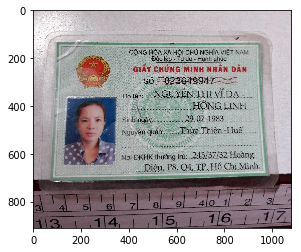

In [43]:
plt.imshow(image)

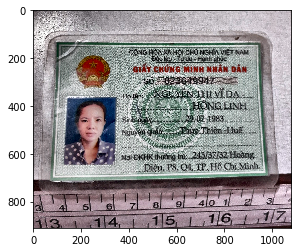

In [44]:
clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
plt.imshow(img2)

In [61]:
lower_blue = np.array([0,0,0])
upper_blue = np.array([100,100,100])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(img2, lower_blue, upper_blue)


In [62]:
res = cv2.bitwise_and(img2,img2, mask= mask)

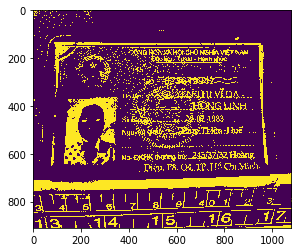

In [63]:
plt.imshow(mask)

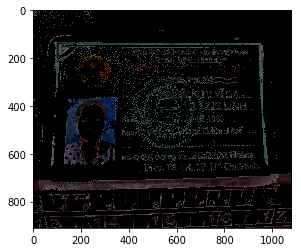

In [64]:
plt.imshow(res)

In [34]:
image = cv2.imread(r'C:\Users\Mihail\opencv-text-detection\images\image_front_1.jpg')

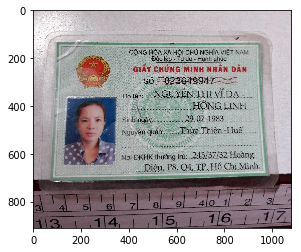

In [35]:
plt.imshow(image)

In [36]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
chans = cv2.split(image)[2]**0.3
#chans = cv2.split(image)[2]*7
normilized = chans**0.3
normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7
thresh=normilized.mean()*0.999
#thresh = threshold_otsu(normilized)
binary = normilized > thresh

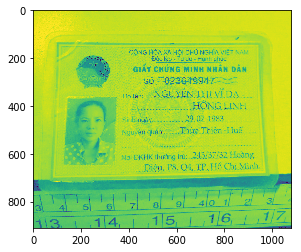

In [37]:
plt.imshow(chans)

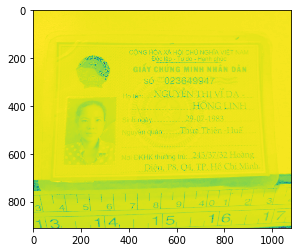

In [38]:
plt.imshow(normilized)

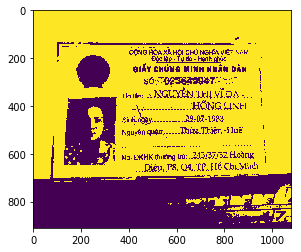

In [39]:
plt.imshow(binary)

In [40]:
contours = measure.find_contours(binary, 0.3)

print("contours=", len(contours))
contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))

contours= 1096


In [41]:
lst=[]
lst_countours_clean=[]
for n, contour in enumerate(contours):
    Xmin = int(np.floor(np.min(contour[:,1])))-4
    Xmax = int(np.ceil(np.max(contour[:,1])))+0
    Ymin = int(np.floor(np.min(contour[:,0])))-4
    Ymax = int(np.ceil(np.max(contour[:,0])))+4
    if Xmax-Xmin>5 and Ymax-Ymin>15:
        if len(lst)==0:
            lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
            lst_countours_clean.append(contour)

        elif len(lst)>0 and len(lst)<ln:

            check=[]
            for x in lst:
                rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                check.append(rox)
            min_distance = np.min(np.array(check))
            if min_distance>20:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)

        else:
            break

lst_countours_clean= 6


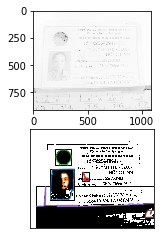

In [42]:
lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])

print("lst_countours_clean=", len(lst_countours_clean))

lst = sorted(lst, key=lambda x: x[0])

#canvas = np.zeros(img.shape)

fig, ax = plt.subplots(2,1)


ax[0].imshow(normilized, interpolation='nearest', cmap=plt.cm.gray)

ax[1].imshow(binary, interpolation='nearest', cmap=plt.cm.gray)
for i, contour in enumerate(lst_countours_clean):

        # Get the rectangle that contains the contour
        Xmin = lst[i][0]
        Xmax = lst[i][1]
        Ymin = lst[i][2]
        Ymax = lst[i][3]

        #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

        tmp = normilized[Ymin:Ymax, Xmin:Xmax]

        #tmp = dilation(tmp, [[1,1],[1,1]])
        #tmp = thin(tmp)
        #tmp = dilation(tmp, [[1,1],[1,1]])
        #plt.imsave(os.path.join(dir_parts,'t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

        rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)
        ax[1].add_patch(rect)

        ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1)


ax[1].axis('image')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()